In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install bert-for-tf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30515 sha256=792cd87ceec914eceb32e0dc4971c07301ee4e7a071420d8f186274d3a5a0af3
  Stored in directory: /root/.cache/pip/wheels/d8/da/50/126d7b8416d9a0e6bf876935c2219a71e72a6529c25e150c56
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19457 sha256=721708161f6c0ea8bdc9f6170118daece6e7e80b04213b34c132753bfc4ec4c3
  Stored in directory: /root/.cache/pip/wheels/97/a8/d0/f7419404174976a2686bb98b5c30df01cc71445415f32db9e6
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7892 sha256=9d846ce04ef2a66a08f5689f8efcf1e19c4c38396c09955d02ad65b5cc265665
  Sto

In [ ]:

!pip install tensorflow --upgrade
!pip install keras --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:


# imports
import tensorflow as tf
from tensorflow import keras
from keras import layers, callbacks, optimizers, utils, models
from keras.preprocessing.image import ImageDataGenerator 
from keras.applications.inception_v3 import InceptionV3
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.applications.inception_resnet_v2 import InceptionResNetV2
#import torch
import bert

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet import ResNet50
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense,Dropout, Flatten,BatchNormalization, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from keras import regularizers
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_recall_fscore_support
from matplotlib.pyplot import figure
from keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder

import numpy as np 
import pandas as pd
import re
import os
import glob
import cv2
import sys
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:

# defining a function that takes in the model's' log file, and outputs its learning curve

def evalFunction(df):
  figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)

  plt.plot(df['accuracy'])
  plt.plot(df['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('Number of Epochs')
  plt.legend(['train', 'validation'], loc='upper right')

  plt.subplot(1, 2, 2)

  plt.plot(df['loss'])
  plt.plot(df['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('Number of Epochs')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()


In [ ]:
# commonly used variables
train_samples = 10265
validation_samples = 2567
n_classes = 5
epochs = 25
batch_size = 128

#**BERT+BiLSTM Model**

In [ ]:
train_df =  pd.read_csv('/content/gdrive/MyDrive/Dataset/train.csv')
test_df =  pd.read_csv('/content/gdrive/MyDrive/Dataset/test.csv')

print ("The size of the training data is: "+str(train_df.shape[0]))
print ("The size of the testing data is: "+str(test_df.shape[0]))

The size of the training data is: 10265
The size of the testing data is: 2567


In [ ]:
train_df.head()

,Title,Image_Name,Cleaned_Ingredients,Flavor
0,Calvados Sidecars,calvados-sidecars .jpg,"['1 lemon wedge', 'Granulated sugar for coatin...",sour
1,Lamb Chops with Everything-Bagel Yogurt and Ch...,lamb-chops-with-everything-bagel-yogurt-and-ch...,"['7 tablespoons olive oil, divided', '2 1/2 te...",sour
2,Porotos Granados,porotos-granados .jpg,"['2 tablespoons canola or olive oil', '1 onion...",salty
3,Classic Cheese Ball,classic-cheese-ball.jpg,"['8 ounces cream cheese, at room temperature',...",salty
4,Israeli Couscous with Roasted Butternut Squash...,israeli-couscous-with-roasted-butternut-squash...,"['1 preserved lemon', '1 1/2 pound butternut s...",sour


In [ ]:
# adding the value of the "Title" column to the beginning of the "Cleaned_Ingredients" column so we can use both the title and ingredients in classification

train_df["Cleaned_Ingredients"] = train_df["Title"] + " " + train_df["Cleaned_Ingredients"]

test_df["Cleaned_Ingredients"] = test_df["Title"] + " " + test_df["Cleaned_Ingredients"]

train_df.head()

,Title,Image_Name,Cleaned_Ingredients,Flavor
0,Calvados Sidecars,calvados-sidecars .jpg,"Calvados Sidecars ['1 lemon wedge', 'Granulate...",sour
1,Lamb Chops with Everything-Bagel Yogurt and Ch...,lamb-chops-with-everything-bagel-yogurt-and-ch...,Lamb Chops with Everything-Bagel Yogurt and Ch...,sour
2,Porotos Granados,porotos-granados .jpg,Porotos Granados ['2 tablespoons canola or oli...,salty
3,Classic Cheese Ball,classic-cheese-ball.jpg,"Classic Cheese Ball ['8 ounces cream cheese, a...",salty
4,Israeli Couscous with Roasted Butternut Squash...,israeli-couscous-with-roasted-butternut-squash...,Israeli Couscous with Roasted Butternut Squash...,sour


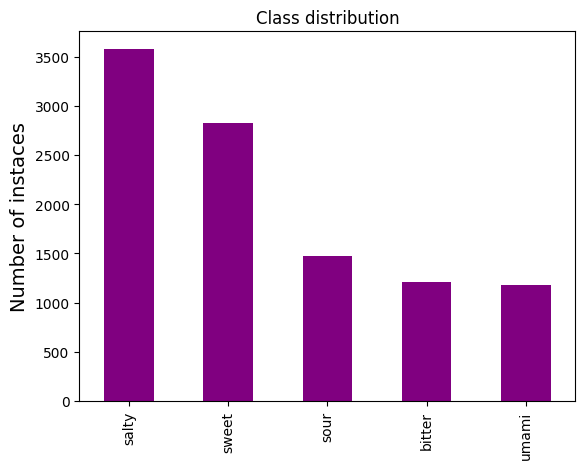

In [ ]:
# class distribution of the training data
classDist = train_df['Flavor'].value_counts().plot(kind = 'bar', color= ['purple'],title = 'Class distribution' )
classDist.set_ylabel("Number of instaces",fontsize=14)
plt.show()


In [ ]:
# encoding the labels
encoder = LabelEncoder()

encoded_train_labels = encoder.fit_transform(train_df.Flavor.values)
train_labels = utils.to_categorical(encoded_train_labels, 5)

encoded_test_labels = encoder.fit_transform(test_df.Flavor.values)
test_labels = utils.to_categorical(encoded_test_labels, 5)

# creating the training and testing data variables without the labels
train_text = train_df['Cleaned_Ingredients']
test_text = test_df['Cleaned_Ingredients']


print("Shape of train data:", train_text.shape)
print("Shape of train labels:", train_labels.shape)


print("Shape of test data:", test_text.shape)
print("Shape of test labels:", test_labels.shape)

Shape of train data: (10265,)
Shape of train labels: (10265, 5)
Shape of test data: (2567,)
Shape of test labels: (2567, 5)


In [ ]:
# importing the BERT BASE model from Tensorflow HUB 
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [ ]:

# Preprocessing of texts according to BERT

def get_masks(text, max_length):
    """Mask for padding"""
    tokens = tokenizer.tokenize(text)
    tokens = ["[CLS]"] + tokens + ["[SEP]"]
    length = len(tokens)
    if length > max_length:
        tokens = tokens[:max_length]

    return np.asarray([1]*len(tokens) + [0] * (max_length - len(tokens)))
vec_get_masks = np.vectorize(get_masks, signature = '(),()->(n)')

def get_segments(text, max_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    tokens = tokenizer.tokenize(text)
    tokens = ["[CLS]"] + tokens + ["[SEP]"]
    length = len(tokens)
    if length > max_length:
        tokens = tokens[:max_length]
    
    segments = []
    current_segment_id = 0
    with_tags = ["[CLS]"] + tokens + ["[SEP]"]
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return np.asarray(segments + [0] * (max_length - len(tokens)))
vec_get_segments = np.vectorize(get_segments, signature = '(),()->(n)')

def get_ids(text, tokenizer, max_length):
    """Token ids from Tokenizer vocab"""
    tokens = tokenizer.tokenize(text)
    tokens = ["[CLS]"] + tokens + ["[SEP]"]
    length = len(tokens)
    if length > max_length:
        tokens = tokens[:max_length]

    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = np.asarray(token_ids + [0] * (max_length-length))
    return input_ids
vec_get_ids = np.vectorize(get_ids, signature = '(),(),()->(n)')


def prepare(text_array, tokenizer, max_length):
    
    ids = vec_get_ids(text_array, 
                      tokenizer, 
                      max_length).squeeze()
    masks = vec_get_masks(text_array,
                      max_length).squeeze()
    segments = vec_get_segments(text_array,
                      max_length).squeeze()

    return ids, segments, masks

In [ ]:
max_length = 512 
ids_train, segments_train, masks_train = prepare(train_text,
                                                 tokenizer,
                                                 max_length)
ids_test, segments_test, masks_test = prepare(test_text, 
                                               tokenizer,
                                               max_length)

In [ ]:
Classes = train_df.Flavor.unique()
Classes

array(['sour', 'salty', 'sweet', 'bitter', 'umami'], dtype=object)

In [ ]:
# building the classification model with bert and BiLSTM

input_word_ids = layers.Input(shape=(max_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = layers.Input(shape=(max_length,), dtype=tf.int32,
                                   name="input_masks")
segment_ids = layers.Input(shape=(max_length,), dtype=tf.int32,
                                    name="segment_ids")
den_out, seq_out = bert_layer([input_word_ids, input_mask, segment_ids])

x = layers.Bidirectional(tf.keras.layers.LSTM(units=64, kernel_regularizer=regularizers.l2(0.01), return_sequences=True))(seq_out)
x = layers.Bidirectional(tf.keras.layers.LSTM(units=64))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
output = layers.Dense(n_classes, activation = 'softmax')(x)

BertLSTM_model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=[output])

BertLSTM_model.compile(optimizer = keras.optimizers.Adam(0.0001) , loss = "categorical_crossentropy", metrics=["accuracy"])

BertLSTM_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 input_masks (InputLayer)       [(None, 512)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 512)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 512, 768)]                'input_masks[0][0]',      

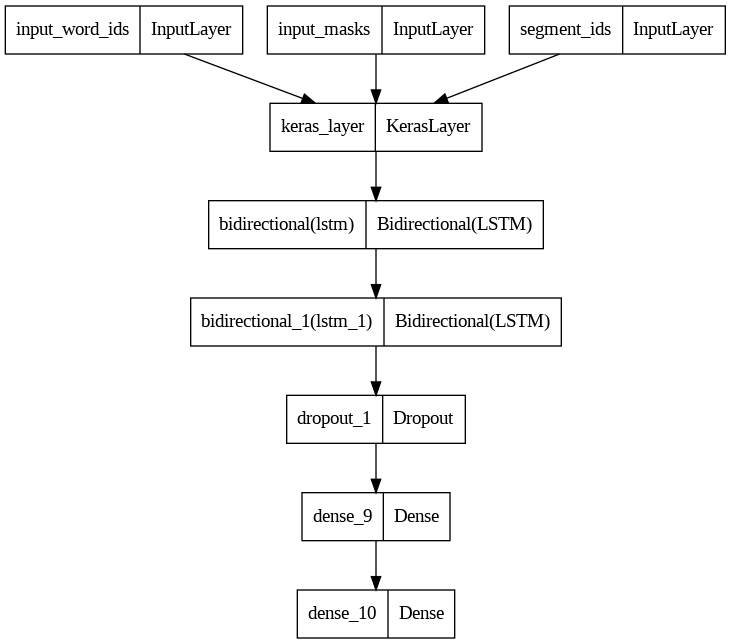

In [ ]:
plot_model(BertLSTM_model, to_file='BertLSTM_model.png')

In [ ]:
# callbacks
reduceLearningRate=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', min_lr=0.00001, factor=0.1, patience=2, verbose=1)
BertLSTM = tf.keras.callbacks.ModelCheckpoint(filepath='/content/gdrive/MyDrive/Models/BertLSTM2.h5', verbose=1, save_best_only=True)
BertLSTM_log = tf.keras.callbacks.CSVLogger('/content/gdrive/MyDrive/Models/BertLSTM2.log')
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

In [ ]:
BertLSTM_model.fit(
      [ids_train, masks_train, segments_train],  
      train_labels,
      steps_per_epoch = train_samples // batch_size,
      validation_data = ([ids_test, masks_test, segments_test], test_labels), 
      validation_steps = validation_samples // batch_size,
      epochs = epochs, verbose=1, callbacks=[reduceLearningRate, BertLSTM, BertLSTM_log, earlyStopping])

Epoch 1/25
80/80 [==============================] - ETA: 0s - loss: 9.7150 - accuracy: 0.4752
Epoch 1: val_loss improved from inf to 8.44208, saving model to /content/gdrive/MyDrive/Models/BertLSTM2.h5
80/80 [==============================] - 683s 8s/step - loss: 9.7150 - accuracy: 0.4752 - val_loss: 8.4421 - val_accuracy: 0.5610 - lr: 1.0000e-04
Epoch 2/25
80/80 [==============================] - ETA: 0s - loss: 7.5401 - accuracy: 0.5879
Epoch 2: val_loss improved from 8.44208 to 6.74193, saving model to /content/gdrive/MyDrive/Models/BertLSTM2.h5
80/80 [==============================] - 655s 8s/step - loss: 7.5401 - accuracy: 0.5879 - val_loss: 6.7419 - val_accuracy: 0.5699 - lr: 1.0000e-04
Epoch 3/25
80/80 [==============================] - ETA: 0s - loss: 6.0884 - accuracy: 0.5976
Epoch 3: val_loss improved from 6.74193 to 5.49958, saving model to /content/gdrive/MyDrive/Models/BertLSTM2.h5
80/80 [==============================] - 659s 8s/step - loss: 6.0884 - accuracy: 0.5976 - va

# **InceptionResNet (generated images)**

In [ ]:
train_data_dir = "/content/gdrive/MyDrive/generated_images/train"
validation_data_dir = "/content/gdrive/MyDrive/generated_images/test"

In [ ]:
train_data_gen = ImageDataGenerator(
    rescale=1./255)

# Getting the training set
train_generator = train_data_gen.flow_from_directory(
    directory=train_data_dir,
    class_mode='categorical',
    target_size=(299,299),
    color_mode='rgb',
    batch_size=512)


Found 10265 images belonging to 5 classes.


In [ ]:
test_data_gen=ImageDataGenerator( 
    rescale=1./255)

# getting the test set
val_generator = test_data_gen.flow_from_directory(
    directory=validation_data_dir,
    class_mode='categorical',
    target_size=(299,299),
    color_mode='rgb',
    batch_size=512)

Found 2567 images belonging to 5 classes.


In [ ]:
# callbacks
reduceLearningRate=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', min_lr=0.00001, factor=0.1, patience=3, verbose=1)
inceptionResg = tf.keras.callbacks.ModelCheckpoint(filepath='/content/gdrive/MyDrive/Models/InceptionResGen.h5', verbose=1, monitor = 'val_accuracy', save_best_only=True)
InceptionResg_log = tf.keras.callbacks.CSVLogger('/content/gdrive/MyDrive/Models/InceptionResGen.log')
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6)

In [ ]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

for layer in base_model.layers:
  layer.trainable = False
for layer in base_model.layers[-10:]:
  layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dense(5, activation='softmax')(x)

InceptionResGen = Model(inputs=base_model.input, outputs=x)

InceptionResGen.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

InceptionResGen.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_609 (Conv2D)            (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_609 (Batch  (None, 149, 149, 32  96         ['conv2d_609[0][0]']             
 Normalization)                 )                                                           

In [ ]:
# training the model
InceptionResGen.fit(
      train_generator, 
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = val_generator, 
      validation_steps = val_generator.samples // batch_size,
      epochs = 15,
      verbose=1, 
      callbacks=[reduceLearningRate, inceptionResg, InceptionResg_log, earlyStopping])  

Epoch 1/15
20/20 [==============================] - ETA: 0s - loss: 10.6547 - accuracy: 0.4732
Epoch 1: val_accuracy did not improve from 0.77656
20/20 [==============================] - 169s 8s/step - loss: 10.6547 - accuracy: 0.4732 - val_loss: 7.1765 - val_accuracy: 0.5379 - lr: 0.0010
Epoch 2/15
20/20 [==============================] - ETA: 0s - loss: 5.2963 - accuracy: 0.5532
Epoch 2: val_accuracy did not improve from 0.77656
20/20 [==============================] - 146s 7s/step - loss: 5.2963 - accuracy: 0.5532 - val_loss: 3.6494 - val_accuracy: 0.5531 - lr: 0.0010
Epoch 3/15
20/20 [==============================] - ETA: 0s - loss: 2.8672 - accuracy: 0.5582
Epoch 3: val_accuracy did not improve from 0.77656
20/20 [==============================] - 147s 7s/step - loss: 2.8672 - accuracy: 0.5582 - val_loss: 2.2676 - val_accuracy: 0.5566 - lr: 0.0010
Epoch 4/15
20/20 [==============================] - ETA: 0s - loss: 1.9261 - accuracy: 0.5693
Epoch 4: val_accuracy did not improve fr

# **Early Fusion Model (combining the features extracted by the previous two models)**



In [ ]:
# importing the BERT BASE model from Tensorflow HUB 
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [ ]:
# commonly used variables
train_samples = 10265
validation_samples = 2567
n_classes = 5
epochs = 25
batch_size = 128
max_length = 128

In [ ]:
# preprocessing of texts according to BERT
def get_tokens(text, tokenizer):
  tokens = tokenizer.tokenize(text)
  tokens = ["[CLS]"] + tokens + ["[SEP]"]
  length = len(tokens)
  if length > max_length:
      tokens = tokens[:max_length]
  return tokens, length  


def get_masks(text, tokenizer, max_length):
    """Mask for padding"""
    tokens, length = get_tokens(text, tokenizer)
    return np.asarray([1]*len(tokens) + [0] * (max_length - len(tokens)))
vec_get_masks = np.vectorize(get_masks, signature = '(),(),()->(n)')

def get_segments(text, tokenizer, max_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    tokens, length = get_tokens(text, tokenizer)
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return np.asarray(segments + [0] * (max_length - len(tokens)))
vec_get_segments = np.vectorize(get_segments, signature = '(),(),()->(n)')

def get_ids(text, tokenizer, max_length):
    """Token ids from Tokenizer vocab"""
    tokens = tokenizer.tokenize(text)
    tokens = ["[CLS]"] + tokens + ["[SEP]"]
    length = len(tokens)
    if length > max_length:
        tokens = tokens[:max_length]

    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = np.asarray(token_ids + [0] * (max_length-length))
    return input_ids
vec_get_ids = np.vectorize(get_ids, signature = '(),(),()->(n)')

def preprocess_text(sen):
    return sen
vec_preprocess_text = np.vectorize(preprocess_text)
def get_texts(path):
    path = path.decode('utf-8')
    parts = path.split(os.sep)
    image_name = parts[-1]
    is_train = parts[-3] == 'train'
    if is_train:
      df = train_df
    else:
      df = test_df

    text = str(df['Cleaned_Ingredients'])
    return text
vec_get_text = np.vectorize(get_texts)

def prepare_text(paths):
    texts = vec_get_text(paths)
    
    text_array = vec_preprocess_text(texts)
    ids = vec_get_ids(text_array, 
                      tokenizer, 
                      max_length).squeeze().astype(np.int32)
    masks = vec_get_masks(text_array,
                          tokenizer,
                          max_length).squeeze().astype(np.int32)
    segments = vec_get_segments(text_array,
                                tokenizer,
                                max_length).squeeze().astype(np.int32)
    
    return ids, segments, masks

In [ ]:

def load_image(path):
    path = path.decode('utf-8')
    image = cv2.imread(path)
    image = cv2.resize(image, (299, 299))
    image = image/255
    image = image.astype(np.float32)
    parts = path.split(os.sep)
    labels = parts[-2] == Classes 
    labels = labels.astype(np.int32)
    
    return image, labels
    
vec_load_image = np.vectorize(load_image, signature = '()->(r,c,d),(s)')

In [ ]:
# Dataset creation
def prepare_data(paths):
    images, labels = tf.numpy_function(vec_load_image, 
                                      [paths], 
                                      [tf.float32, 
                                        tf.int32])
    
    [ids, segments, masks, ] = tf.numpy_function(prepare_text, 
                                              [paths], 
                                              [tf.int32, 
                                               tf.int32,
                                               tf.int32])
    images.set_shape([None, 299, 299, 3])
    labels.set_shape([None, n_classes])
    ids.set_shape([None, max_length])
    masks.set_shape([None, max_length])
    segments.set_shape([None, max_length])
    return ({"input_word_ids": ids, 
             "input_mask": masks,  
             "segment_ids": segments, 
             "image": images},
            {"class": labels})

In [ ]:

def tf_data(path, batch_size):
    paths = tf.data.Dataset.list_files(path)
    paths = paths.batch(64)
    dataset = paths.map(prepare_data, tf.data.experimental.AUTOTUNE)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    dataset = dataset.unbatch()
    dataset = dataset.batch(64)
    #dataset = dataset.repeat()
    return dataset   
train_data = tf_data('/content/gdrive/MyDrive/generated_images/train/*/*.jpg', batch_size)
test_data = tf_data('/content/gdrive/MyDrive/generated_images/test/*/*.jpg', batch_size)

In [ ]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

for layer in base_model.layers:
  layer.trainable = False
for layer in base_model.layers[-10:]:
  layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)

InceptionResGen = Model(inputs=base_model.input, outputs=x)

InceptionResGen.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
input_word_ids = layers.Input(shape=(max_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = layers.Input(shape=(max_length,), dtype=tf.int32,
                                   name="input_masks")
segment_ids = layers.Input(shape=(max_length,), dtype=tf.int32,
                                    name="segment_ids")
den_out, seq_out = bert_layer([input_word_ids, input_mask, segment_ids])

x = layers.Bidirectional(tf.keras.layers.LSTM(units=64, kernel_regularizer=regularizers.l2(0.01), return_sequences=True))(seq_out)
x = layers.Bidirectional(tf.keras.layers.LSTM(units=64))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)

BertLSTM_model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=[output])
BertLSTM_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_masks (InputLayer)       [(None, 128)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 128)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 128, 768)]                'input_masks[0][0]',      

In [ ]:
input_word_ids = layers.Input(shape=(max_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = layers.Input(shape=(max_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = layers.Input(shape=(max_length,), dtype=tf.int32,
                                    name="segment_ids")
image_input = layers.Input(shape = (299,299,3), dtype=tf.float32,
                           name = "image")

image_side = inception_model(image_input)
text_side = BertLSTM_model([input_word_ids, input_mask, segment_ids])
# Concatenate features from images and texts
merged = layers.Concatenate()([image_side, text_side])
merged = layers.Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.05))(merged)
merged = layers.Dropout(0.5)(merged)
merged = layers.Dense(64, activation = 'relu')(merged)
output = layers.Dense(5, activation='softmax', name = "class")(merged)

early_fusion_model = models.Model([input_word_ids, input_mask, segment_ids, image_input], output)

early_fusion_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 128)]        0           []                         

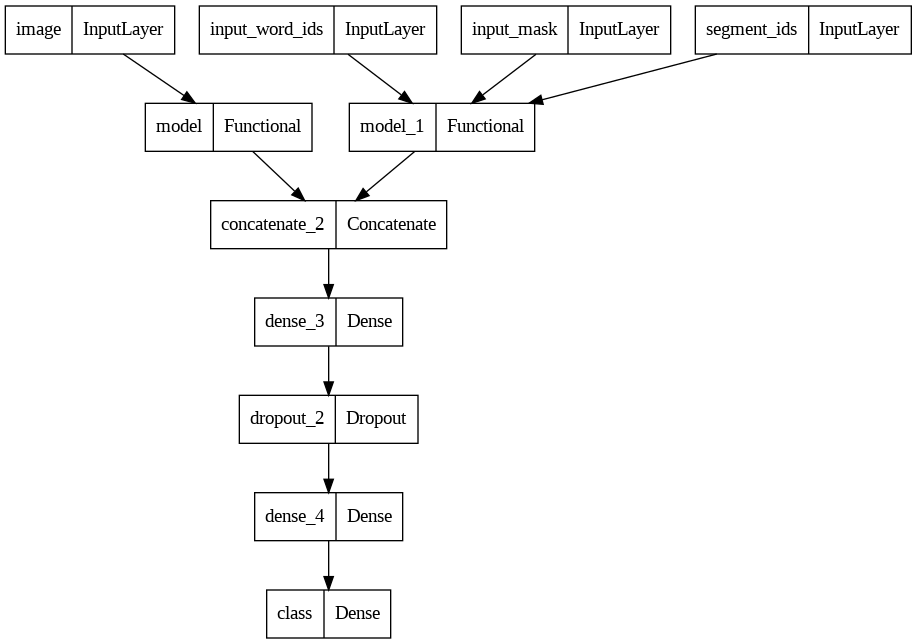

In [ ]:
plot_model(early_fusion_model, to_file='multimodal.png')

In [ ]:
# callbacks
reduceLearningRate=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', min_lr=0.00001, factor=0.1, patience=2, verbose=1)
early_fusion_Model = tf.keras.callbacks.ModelCheckpoint(filepath='/content/gdrive/MyDrive/Models/early_fusion_generated.h5', verbose=1, save_best_only=True, save_weights_only=True)
early_fusion_model_log = tf.keras.callbacks.CSVLogger('/content/gdrive/MyDrive/Models/early_fusion_generated.log')
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
early_fusion_model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

In [ ]:
early_fusion_model.fit(
      train_data,  
      steps_per_epoch = train_samples // batch_size,
      validation_data = test_data,
      validation_steps = validation_samples // batch_size,
      epochs = 20, verbose=1, callbacks=[reduceLearningRate, early_fusion_Model, early_fusion_model_log, earlyStopping])

Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 10.2411 - accuracy: 0.5015
Epoch 1: val_loss improved from inf to 6.43845, saving model to /content/gdrive/MyDrive/Models/early_fusion_generated.h5
20/20 [==============================] - 175s 8s/step - loss: 10.2411 - accuracy: 0.5015 - val_loss: 6.4384 - val_accuracy: 0.5609 - lr: 0.0010
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 4.5063 - accuracy: 0.5613
Epoch 2: val_loss improved from 6.43845 to 2.92127, saving model to /content/gdrive/MyDrive/Models/early_fusion_generated.h5
20/20 [==============================] - 155s 8s/step - loss: 4.5063 - accuracy: 0.5613 - val_loss: 2.9213 - val_accuracy: 0.5699 - lr: 0.0010
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 2.2750 - accuracy: 0.5585
Epoch 3: val_loss improved from 2.92127 to 1.73330, saving model to /content/gdrive/MyDrive/Models/early_fusion_generated.h5
20/20 [==============================] - 155s 8s/step - los

# **Evaluating the Three Models**

In [ ]:

def evalModels(df1, df2, df3):
    # Plot the learning curves
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

    axes[0].plot(df1['val_accuracy'], label='Text model accuracy')
    axes[0].plot(df2['val_accuracy'], label='Image model accuracy')
    axes[0].plot(df3['val_accuracy'], label='Early fusion model accuracy')
    axes[0].set_title('Models Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    axes[1].plot(df1['val_loss'], label='Text model loss')
    axes[1].plot(df2['val_loss'], label='Image model loss')
    axes[1].plot(df3['val_loss'], label='Early fusion model loss')
    axes[1].set_title('Models Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    
    plt.show()


In [ ]:
textModel = pd.read_csv('/content/gdrive/MyDrive/Models/BertLSTM2.log')
imageModel = pd.read_csv('/content/gdrive/MyDrive/Models/InceptionResGen.log')
earlyFusionModel = pd.read_csv('/content/gdrive/MyDrive/Models/early_fusion_generated.log')

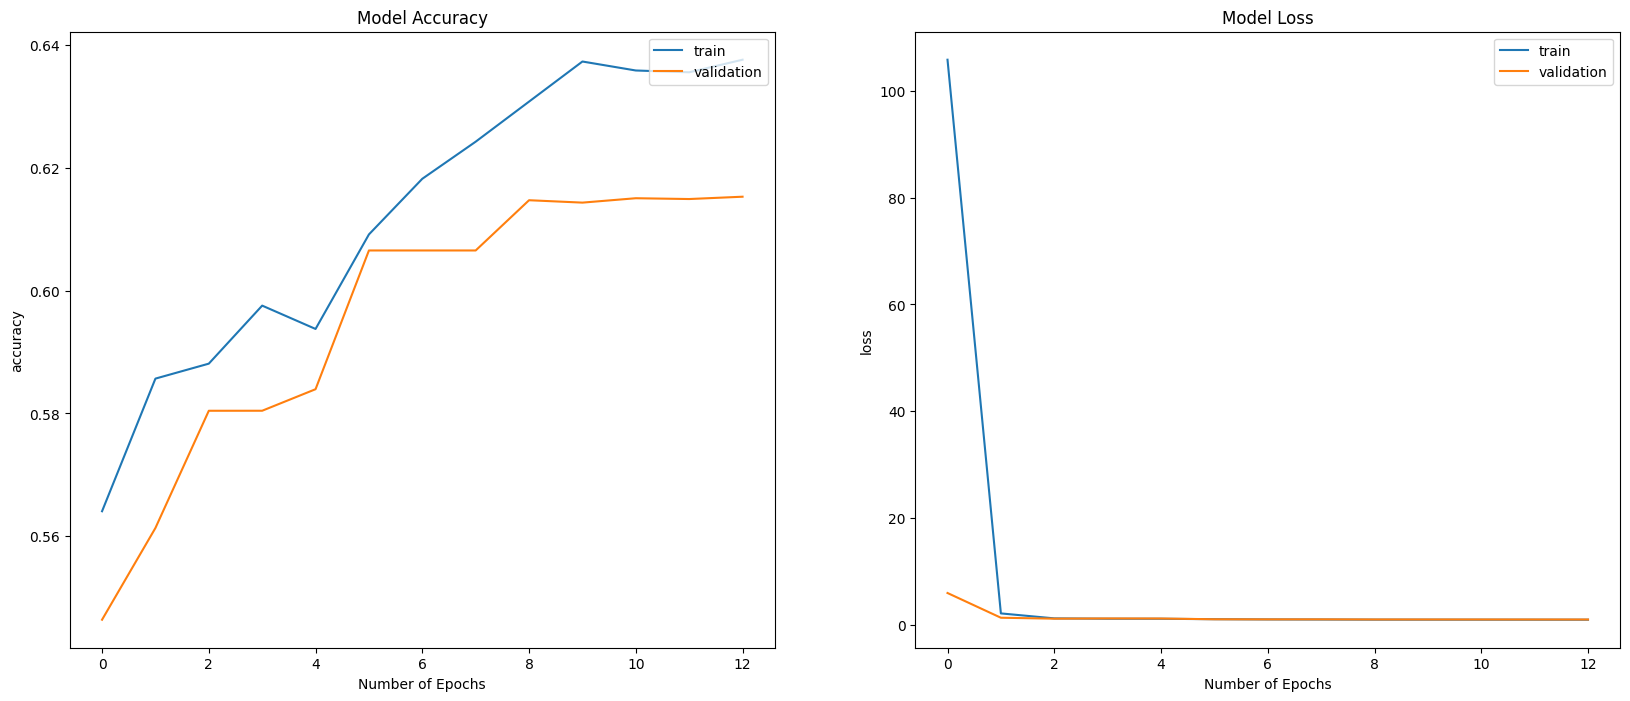

In [ ]:
evalFunction(textModel)

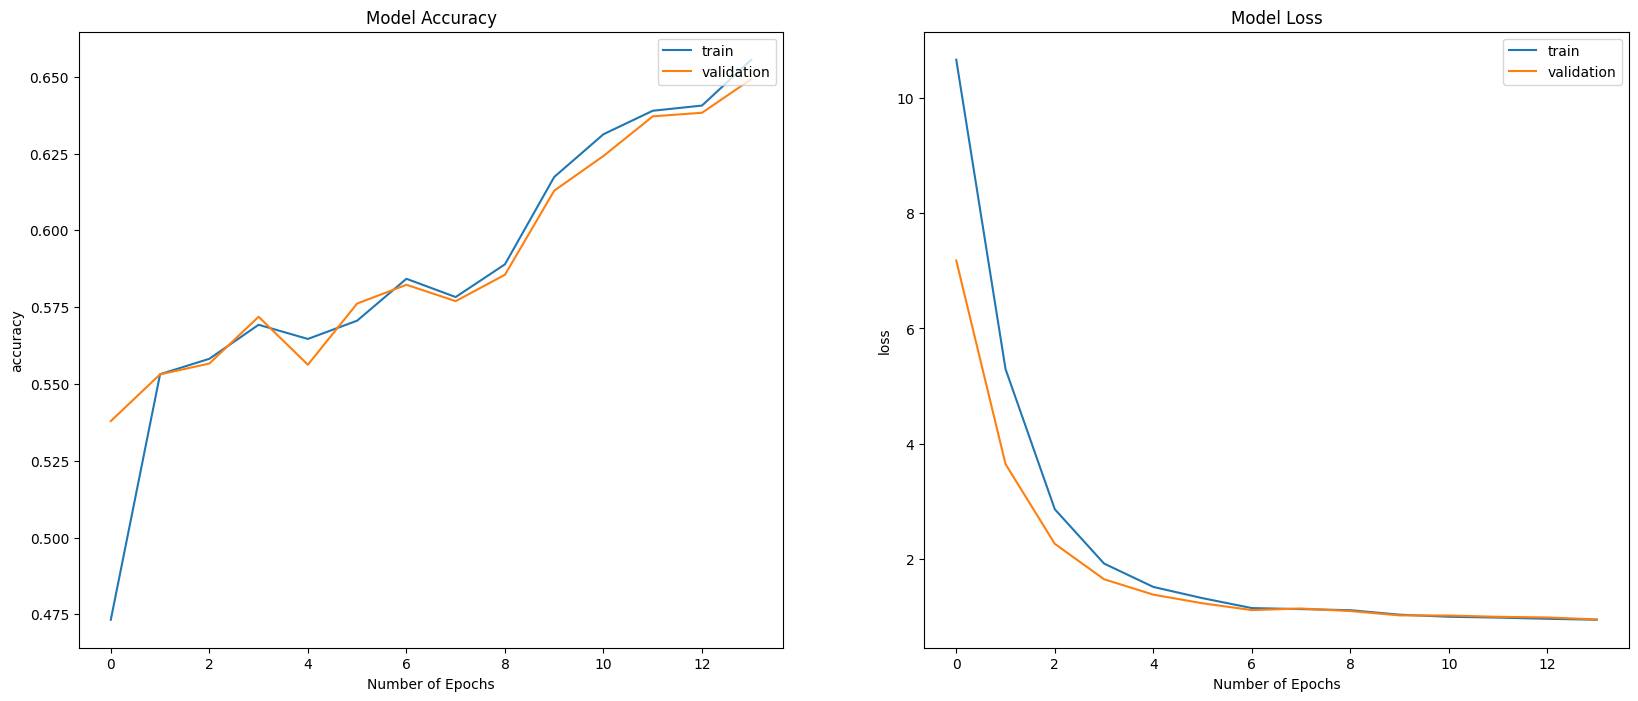

In [ ]:
evalFunction(imageModel)

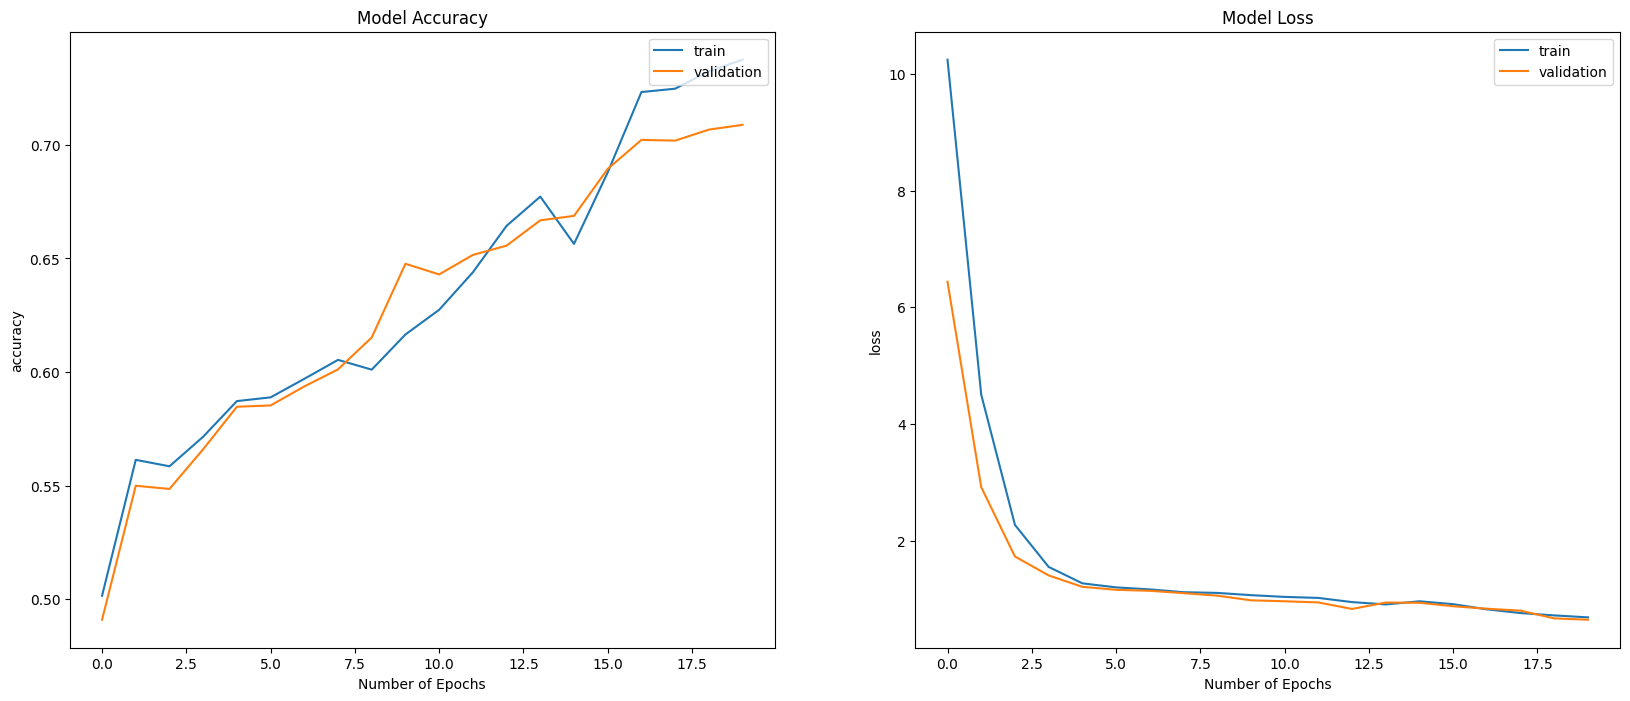

In [ ]:
evalFunction(earlyFusionModel)

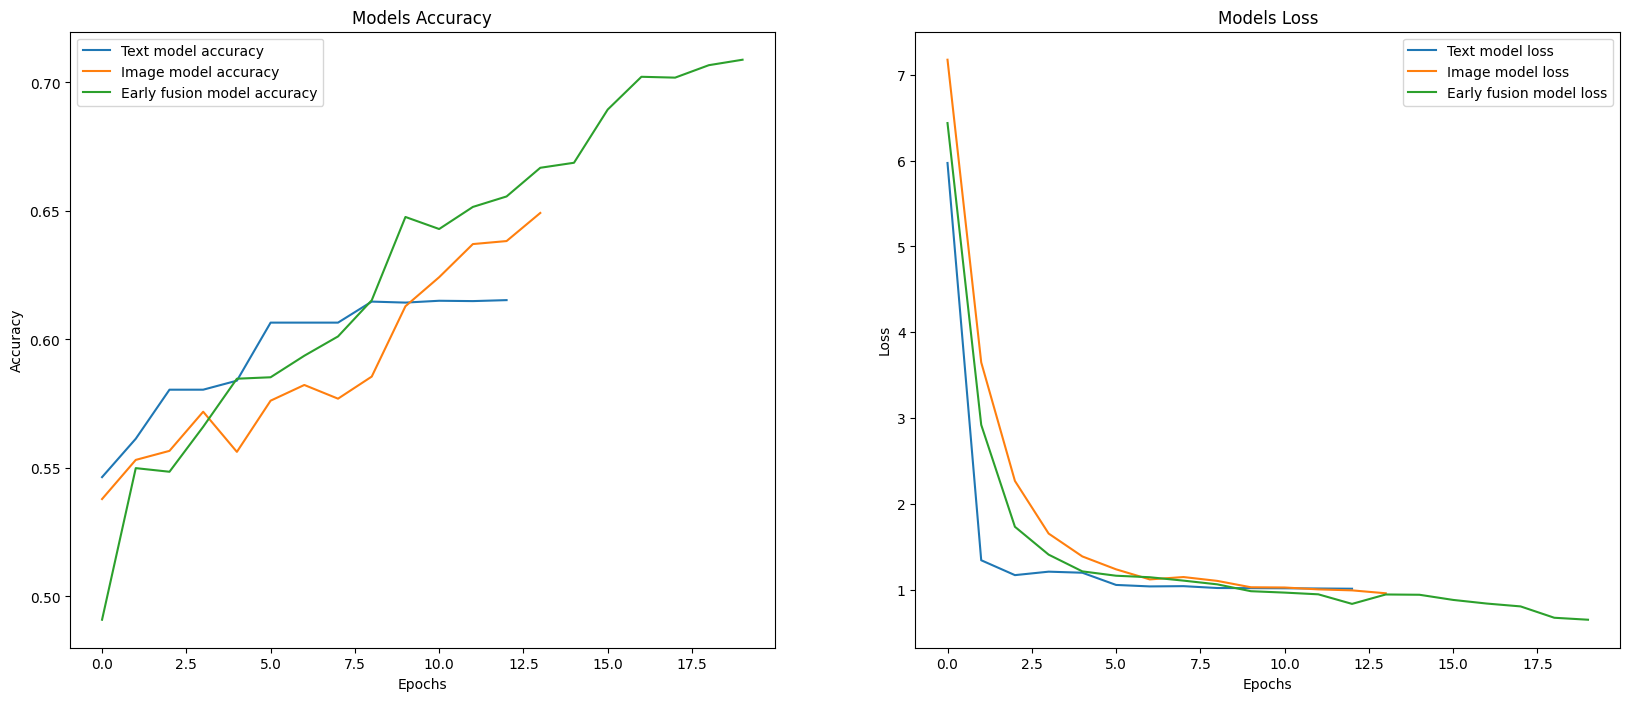

In [ ]:
evalModels(textModel, imageModel, earlyFusionModel)